In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/youtube analysis

/content/gdrive/MyDrive/youtube analysis


In [4]:
import pandas as pd
import json
from collections import Counter
import wordcloud
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [5]:
df = pd.read_parquet('youtube-videos.parquet')
df.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
32691,NKmGVE85GUU,18.04.05,Why can't you divide by zero? - TED-Ed,TED-Ed,27,2018-04-23T15:00:43.000Z,"TED|""TED-Ed""|""Teded""|""Ted Education""|""TED Ed""|...",1188777,38810,944,3104,https://i.ytimg.com/vi/NKmGVE85GUU/default.jpg,False,False,False,Check out our Patreon page: https://www.patreo...
14374,MLVcmQ62luE,18.26.01,I Tried Cutting My Hair Off With A Sword Like ...,Boldly,22,2018-01-19T19:00:38.000Z,"BuzzFeed|""BuzzFeedBoldly""|""BuzzFeed Boldly""|""B...",7965486,207832,19422,12360,https://i.ytimg.com/vi/MLVcmQ62luE/default.jpg,False,False,False,This is 90 to 100 percent dangerous. Do not tr...
5431,aphpJi5jKrM,17.11.12,Women Play Hair Nah: Don't Touch Black Hair,BuzzFeedVideo,22,2017-12-09T01:00:03.000Z,"buzzfeed|""buzzfeedvideo""|""hair nah""|""don't tou...",433184,12208,3009,3699,https://i.ytimg.com/vi/aphpJi5jKrM/default.jpg,False,False,False,Moisturize and Try Again.\n\nCheck out more aw...
33256,DTDnD3MYwuk,18.07.05,"3rd Quarter, One Box Video: Cleveland Cavalier...",Motion Station,17,2018-04-29T18:58:05.000Z,"sp:dt=2018-04-29T18:56:43+00:00|""sp:vl=en-US""|...",456711,2364,1473,683,https://i.ytimg.com/vi/DTDnD3MYwuk/default.jpg,False,False,False,None
24469,fC8gutkCu1c,18.18.03,[OFFICIAL VIDEO] New Rules x Are You That Some...,PTXofficial,10,2018-03-09T14:59:22.000Z,"Pentatonix|""Penatonix""|""PTX""|""PTXofficial""|""Mi...",3427708,179048,4599,10150,https://i.ytimg.com/vi/fC8gutkCu1c/default.jpg,False,False,False,"PRE-ORDER PTX PRESENTS: TOP POP, VOL. I FEATUR..."
12050,8D7c9CY7vXk,18.15.01,Urban Dictionary Challenge with Elle Mills,itsAlexClark,1,2018-01-13T19:55:35.000Z,"its alex clark|""itsalexclark""|""alex clark""|""it...",60474,2380,122,597,https://i.ytimg.com/vi/8D7c9CY7vXk/default.jpg,False,False,False,Doing the Urban Dictionary Challenge with Elle...
2815,wppAQ8uZpfQ,17.28.11,How Millennials Are Killing the Diamond Industry,Cracked,23,2017-11-26T17:00:06.000Z,"Cracked|""cracked.com""|""sketch""|""comedy""|""funny...",644576,29669,4862,4963,https://i.ytimg.com/vi/wppAQ8uZpfQ/default.jpg,False,False,False,You can’t click a headline this day without he...
27193,pnlNqAmCCgw,18.01.04,Pesto - You Suck at Cooking (episode 73),You Suck At Cooking,26,2018-03-28T13:02:41.000Z,"Pesto|""basil""|""pine nuts""|""sauce""|""dip""|""funny...",785992,31804,755,2339,https://i.ytimg.com/vi/pnlNqAmCCgw/default.jpg,False,False,False,Pesto. It's the besto. \n\nSubscribe: http://...
4846,dDAlGl_8f9U,17.08.12,Honest Trailers - The Santa Clause,Screen Junkies,1,2017-12-05T18:01:42.000Z,"screenjunkies|""screen junkies""|""honest trailer...",1032261,26060,760,3958,https://i.ytimg.com/vi/dDAlGl_8f9U/default.jpg,False,False,False,WIth the holidays quickly approaching look bac...
8035,MSzytvDsPfo,17.24.12,Cut for Time: Hallmark Channel Christmas Promo...,Saturday Night Live,24,2017-12-21T19:05:06.000Z,"snl|""saturday night live""|""snl season 43""|""cut...",922919,12723,528,754,https://i.ytimg.com/vi/MSzytvDsPfo/default.jpg,False,False,False,From the company that writes one-sentence gree...


# Data PreProcess & Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

there 40949 entries on dataset , theres sum columns that had missing value it have just 40379 entries

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [8]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df)

,variable,missing values,filling factor (%)
0,description,570,98.608025
1,video_id,0,100.000000
2,trending_date,0,100.000000
3,title,0,100.000000
4,channel_title,0,100.000000
5,category_id,0,100.000000
6,publish_time,0,100.000000
7,tags,0,100.000000
8,views,0,100.000000
9,likes,0,100.000000


There's 570 missing value on description column

In [9]:
df['description'] = df['description'].fillna(' ')

Filling the missing value on description column

In [10]:
df['category_id'] = df['category_id'].astype(str)

Category change type `category_id` from int to str / object

# Feature Engineering

In [11]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [12]:
df.insert(5, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time

transform trending_date as well as publish_time from string to datetime format. publish_time column will be divided into two separate ones publish_date and publish_time.

In [14]:
id_to_category = {}

with open('/content/gdrive/MyDrive/youtube analysis/youtube-categories.json' , 'r') as json_file:
    data = json.load(json_file)
    for category in data:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

assign the category from json based on `category_id`

In [15]:
df.insert(5, 'category', df['category_id'].map(id_to_category))
df[['category_id', 'category']].head()

,category_id,category
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [16]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# EDA

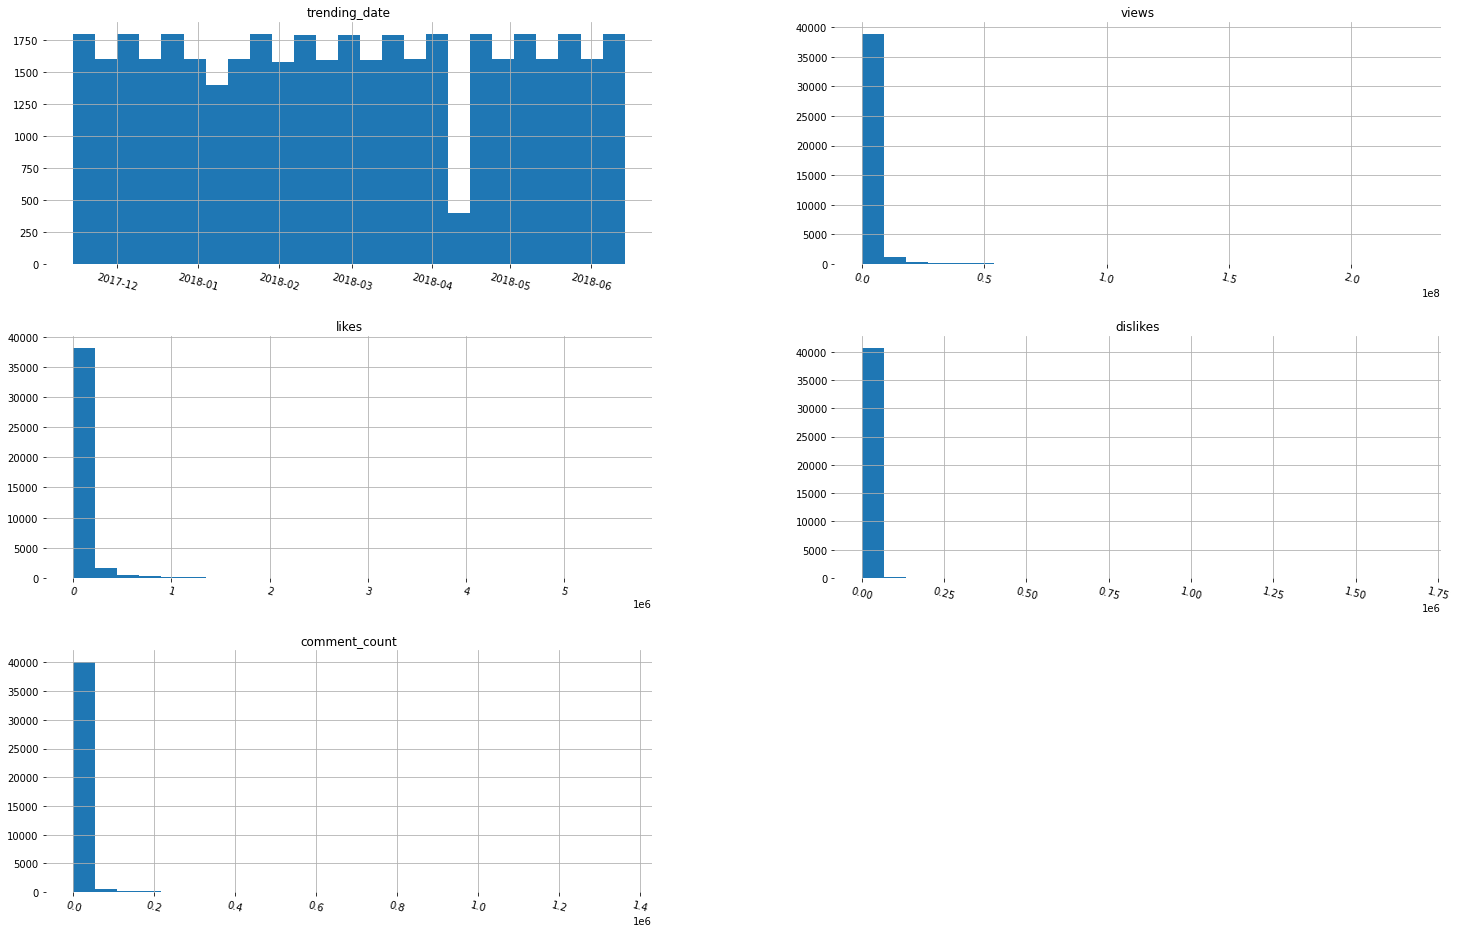

In [17]:
h = df.hist(bins=25,figsize=(25,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Distribution shows skew due to outliers

##Correlation Heatmap

In [18]:
num_list = ['views', 'likes', 'dislikes', 'comment_count']
df_corr = df[num_list].corr()
df_corr

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


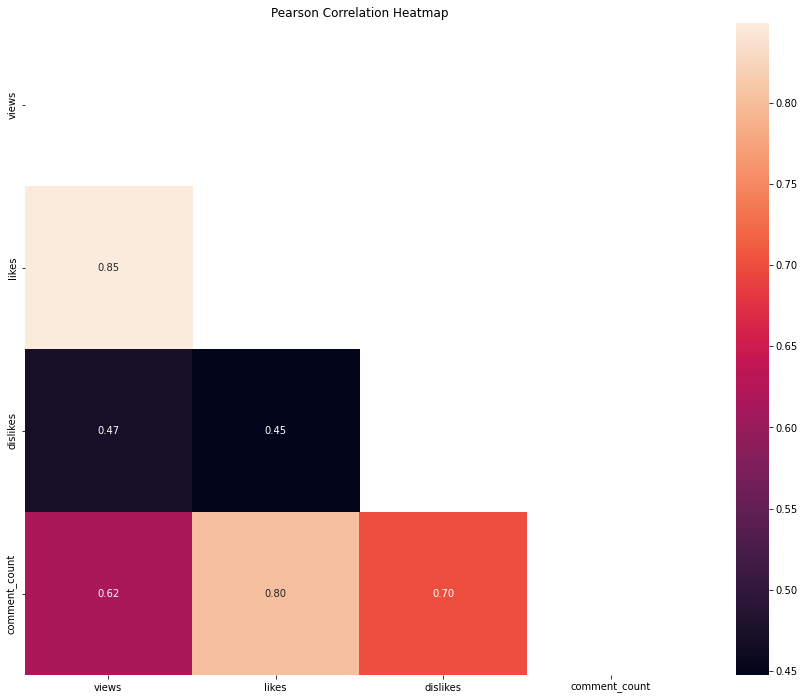

In [19]:
df_corr = df[num_list].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

It's show Views dan Likes is have a strong correlation as well as Likes and Comment_count

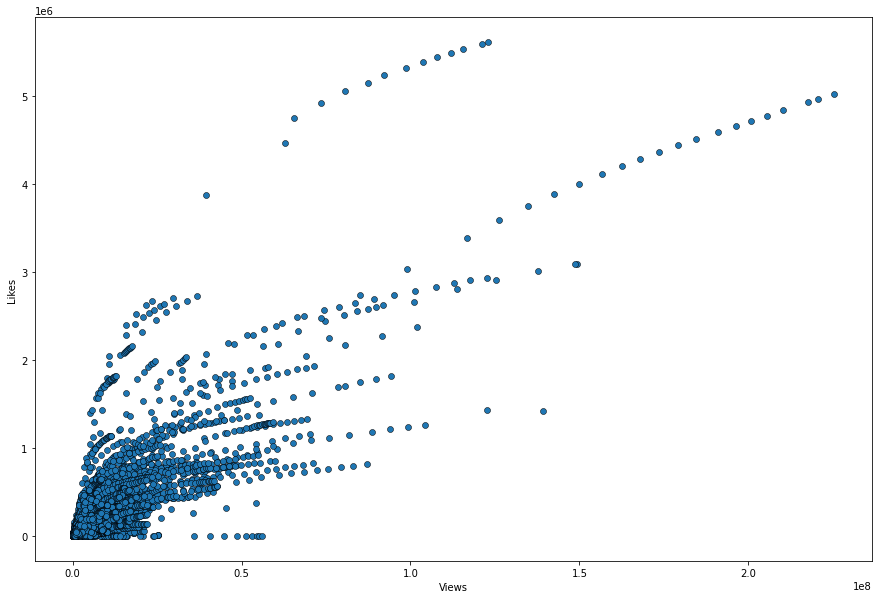

In [20]:
fig,ax=plt.subplots(figsize=(15,10))
plt.scatter(x=df['views'], y=df['likes'], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes")
plt.show()

lets verify with scatter plot.
and thats show on scatter plot, when views increase so the likes as well , positively corelated

#  Top Categorys Videos

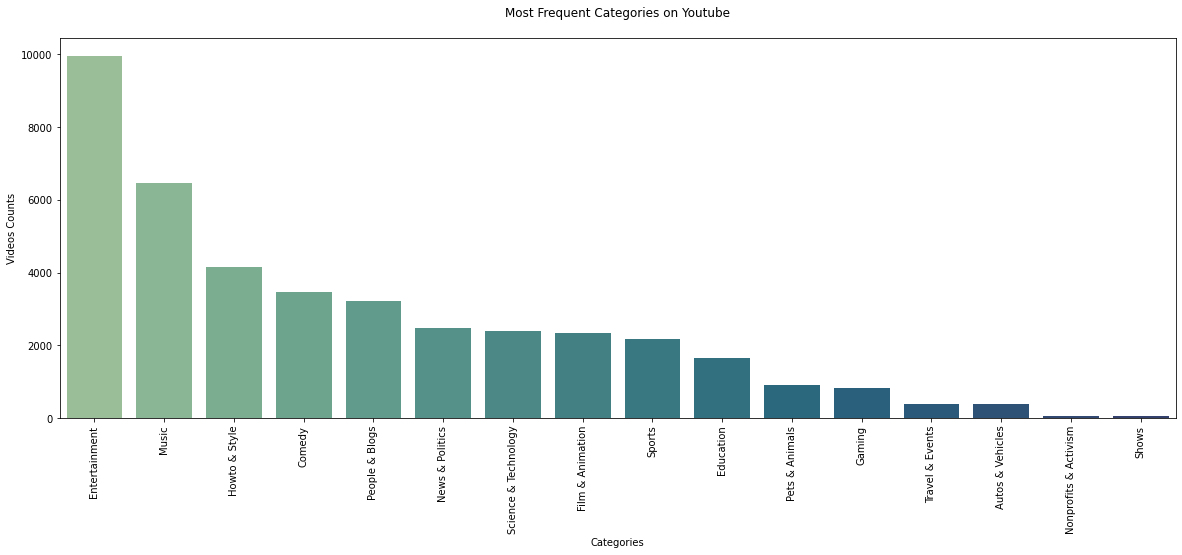

In [21]:
category = df['category'].value_counts()
fig,ax=plt.subplots(figsize=(20,7))
plt.title("Most Frequent Categories on Youtube\n")
sns.barplot(x = category.index, y = category.values, palette='crest')
plt.ylabel('Videos Counts')
plt.xlabel('Categories')
plt.xticks(rotation=90)
plt.show()

# Top Creators

In [22]:
Tcreator = df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(10)

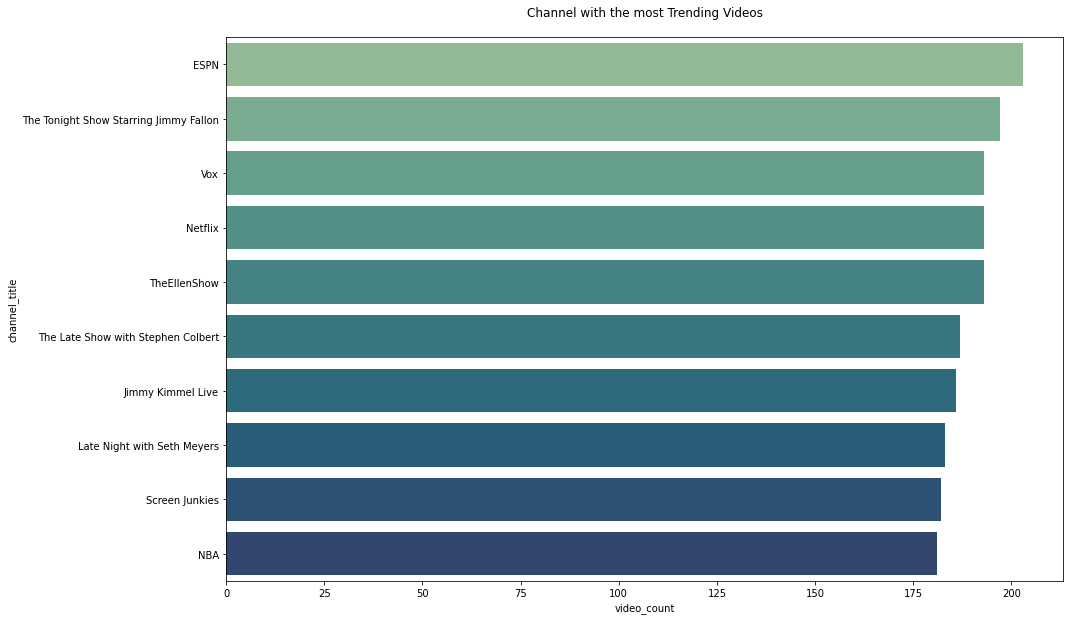

In [23]:
fig,ax=plt.subplots(figsize=(15,10))
plt.title('Channel with the most Trending Videos\n')
sns.barplot(x='video_count', y='channel_title', data=Tcreator,palette='crest')
plt.xlabel='No. of videos'
plt.ylabel='Channel'
plt.show()

# Most Common Clickbait

In [24]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
clickbait = df['title'].apply(cleaning)
p = Counter(" ".join(clickbait).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

       Word  Frequency
0  official       3941
1     video       2864
2      2018       2238
3   trailer       2000
4        ft       1301
5        vs       1046
6       new       1005
7         2        909
8      2017        884
9    makeup        876


In [26]:
clickbait = df['tags'].apply(cleaning)
p = Counter(" ".join(clickbait).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

       Word  Frequency
0        vs       2381
1       new       1727
2     music       1657
3      none       1535
4    makeup       1492
5      make       1342
6      late       1211
7     voice       1194
8      life       1068
9  official       1026


In [27]:
clickbait = df['description'].apply(cleaning)
p = Counter(" ".join(clickbait).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

       Word  Frequency
0     video      19086
1        us      15104
2       new      14135
3     music      13622
4    videos      12994
5         »      12798
6   channel      11122
7   twitter      11078
8       get      10784
9  facebook       9790


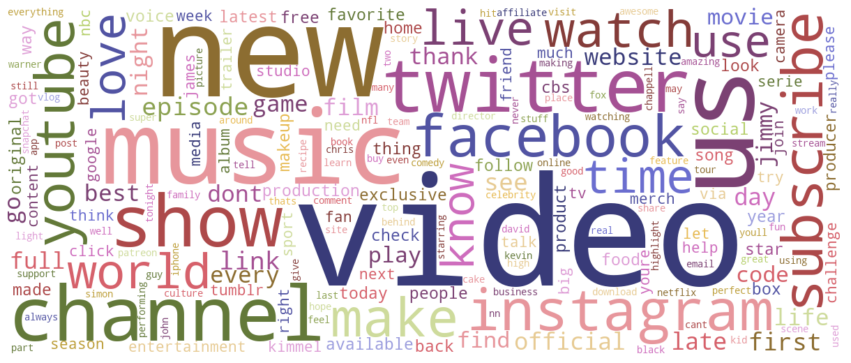

In [28]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(clickbait))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## Contain Capital or not

In [29]:
def huruf_besar(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

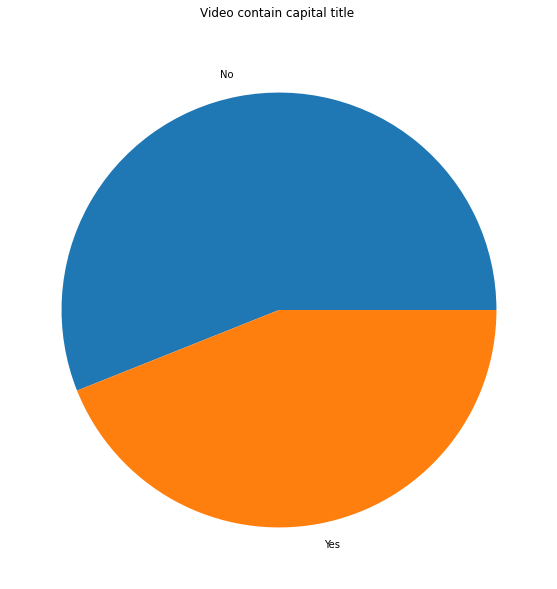

In [30]:
fig,ax=plt.subplots(figsize=(15,10))
df['Capitals'] = df["title"].apply(huruf_besar)
jumlah = df['Capitals'].value_counts().to_dict()
plt.title('Video contain capital title \n')
plt.pie([jumlah[False],jumlah[True]], labels=['No', 'Yes'])
plt.show()

# Likes, Dislikes, Comments

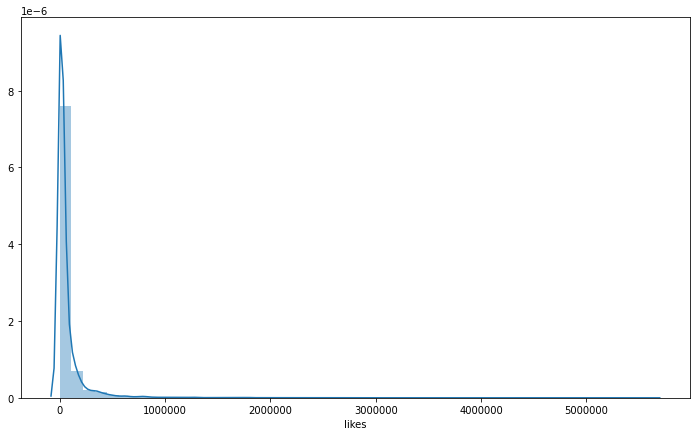

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(df['likes'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()